## Machine Learning for Neuroscience, Department of Brain Sciences, Faculty of Medicine,  Imperial College London

### Contributors: Marirena Bafaloukou, Ruxandra Mihai, Alex Capstick, Nan Fletcher-Lloyd, Yu Chen, Tianyu Cui, Payam Barnaghi

**Spring 2024**

# **Normalisation**

One of the most important assumptions for most statistical tests(T-tests, One-way ANOVA etc) and for some machine learning models (Gaussian Naive Bayes) is **normality**. (tip: any method with "Gaussian" in the name probably assumes normality.)

### **What is a normal distribution?**

Normal distribution, also known as the "bell curve", is a  statistical distribution where a roughly equal observations fall above and below the mean, the mean, median and mode are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

The ± SD (standard deviation) plays a crucial role in describing the spread of values within a normal distribution. According to the **Empirical Rule**:

- Approximately 68% of the data falls within one standard deviation of the mean (mean ± 1 SD). 
- Approximately 95% of the data falls within two standard deviations of the mean (mean ± 2 SD).
- Approximately 99.7% of the data falls within three standard deviations of the mean (mean ± 3 SD).

This rule highlights the typical distribution of values in a normal distribution.

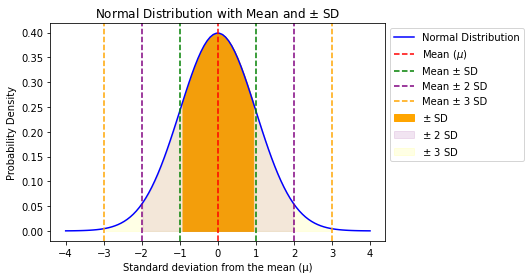

_________

### **How to check if your data is normally distributed?**

1. The most common analytical tests to check data for normal distribution are: 

   a. Shapiro-Wilk Test
   
   b. Kolmogorov-Smirnov Test

   c. Anderson-Darling Test

2. Visualisation methods

   a. Histograms

   b. Density plots

   c. Q-Q plots 

In the following cell we create a dataframe for the examples.

In [1]:
# Do not change the code in this cell

# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate fake data for 100 patients
n_patients = 100
patient_ids = np.arange(1, n_patients + 1)

# Normal distribution 
normal_vars = {
    'heart_rate': np.random.normal(75, 10, n_patients),
    'respiratory_rate': np.random.normal(16, 2, n_patients),
    'blood_pressure': np.random.normal(120, 10, n_patients),
    'hr_variability': np.random.normal(50, 5, n_patients),
    'temp_bedroom': np.random.normal(22, 1, n_patients),
    'bedtime_duration_minutes': np.random.normal(450, 30, n_patients),
    'snoring_time_minutes': np.random.normal(30, 15, n_patients),
}

# Positively skewed (using gamma distribution)
positively_skewed_vars = {
    'minutes_of_activity_in_kitchen': np.random.gamma(3, 10, n_patients),
    'minutes_of_activity_in_lounge': np.random.gamma(4, 15, n_patients),
}

# Negatively skewed (using beta distribution)
negatively_skewed_vars = {
    'rem_ratio': np.random.beta(2, 5, n_patients),
    'deep_ratio': np.random.beta(3, 8, n_patients),
    'awake_ratio': np.random.beta(1, 3, n_patients),
}

# Combine all variables
data = {
    'patient_id': patient_ids,
    **normal_vars,
    **positively_skewed_vars,
    **negatively_skewed_vars,
}

# Create  DataFrame
df = pd.DataFrame(data)


### **1. Shapiro-Wilk test**

In [2]:
# check for normality using the shapiro-wilk test
from scipy.stats import shapiro

sw_statistic, sw_p_value = shapiro(df["heart_rate"])
print(f"Shapiro-Wilk Test for heart_rate: W Statistic = {sw_statistic}, P-value = {sw_p_value}")


Shapiro-Wilk Test for heart_rate: W Statistic = 0.9898829460144043, P-value = 0.6551328897476196


If the p-value is less than the significance level (0.05), the **null hypothesis that the data is normally distributed** can be rejected


### **2. Histogram and/or density plot** 

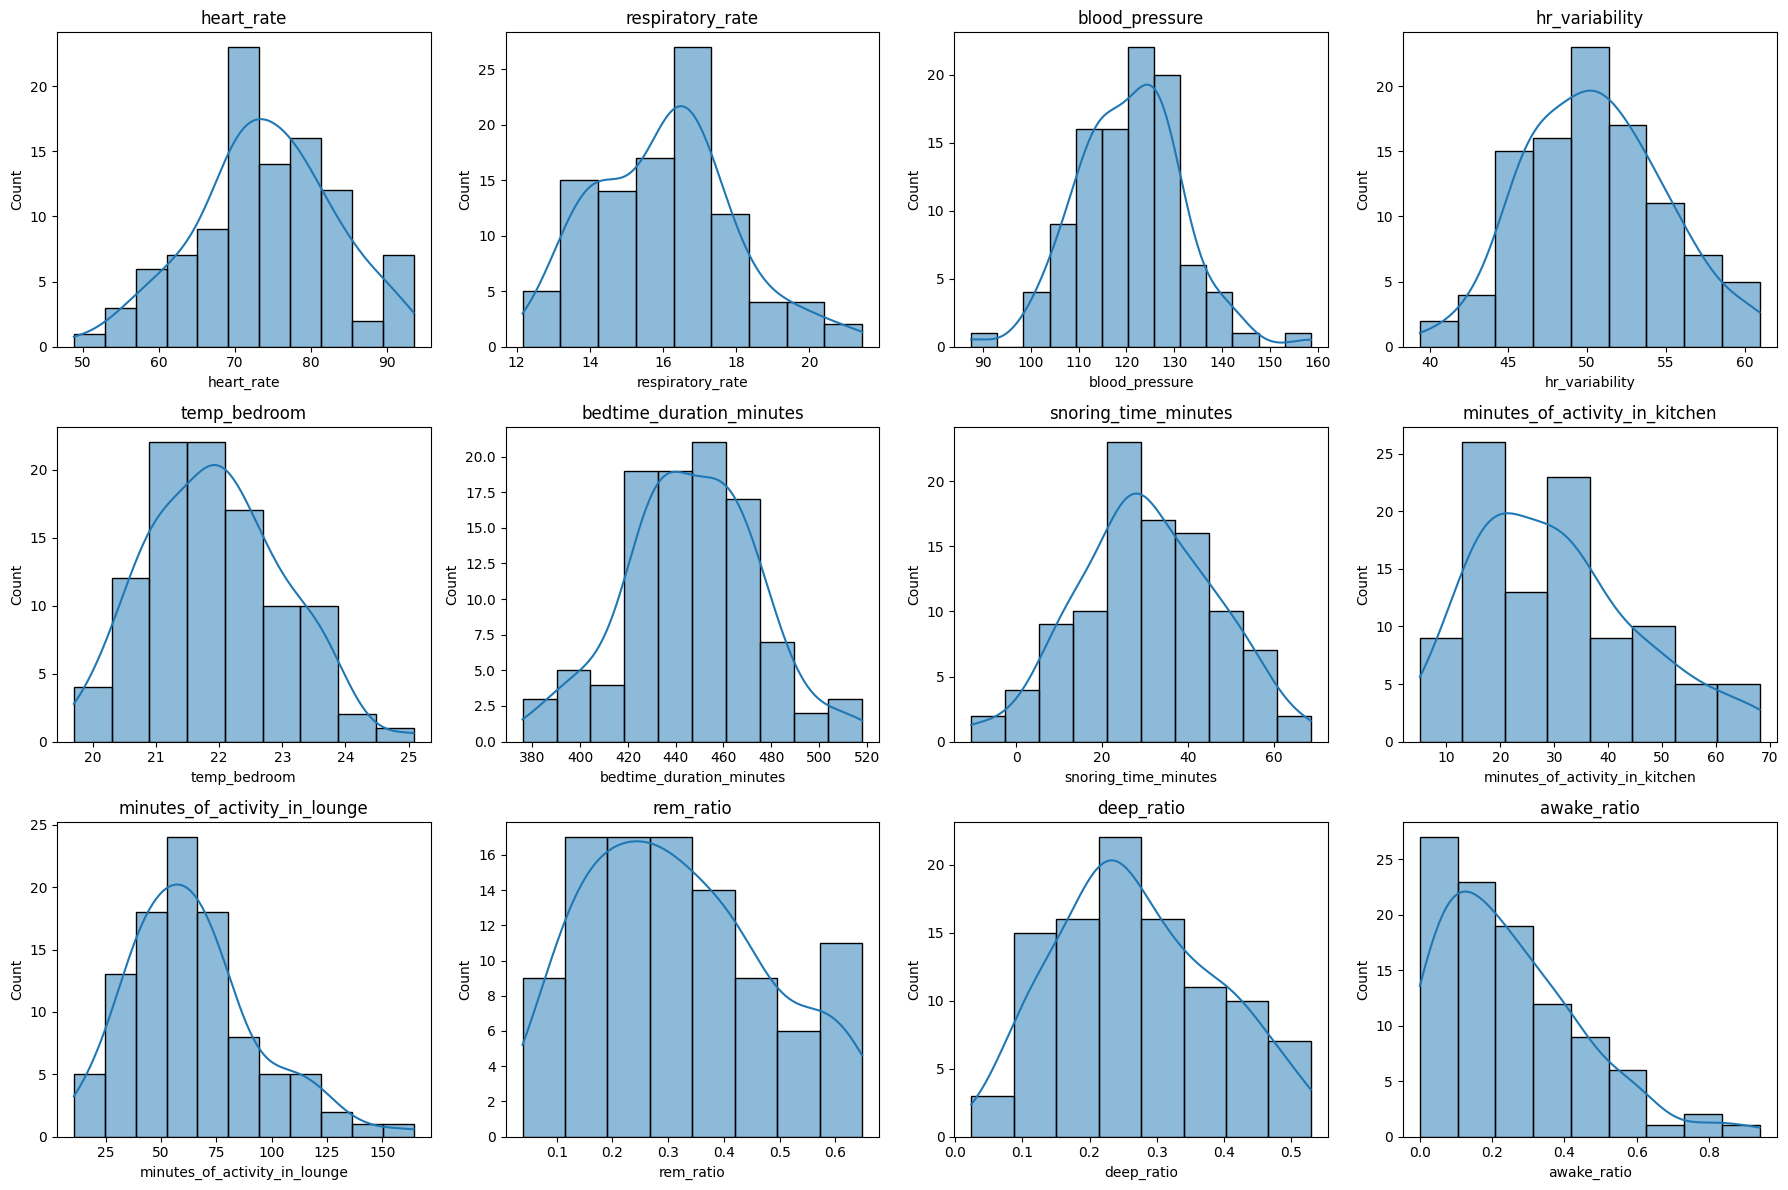

In [3]:
#Use of a histogram to visualise the distribution of the values in each feature. 

fig, axes = plt.subplots(3, 4, figsize=(18, 12)) # we create a plot with 12 different subplots since we have 12 features.
axes = axes.flatten()

for i, col in enumerate(df.columns[1:]): # we create a for loop so that the code itirates over each feature and plots it each time in the next subplot
    sns.histplot(df[col], ax=axes[i], kde=True) #kde is enabled and therefore we can also see the density plot on top of the histogram.
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

### **3. Skewness**

The variables with skewness > 1 are highly positively skewed.

The variables with skewness < -1 are highly negatively skewed.

The variables with 0.5 < skewness < 1 are moderately positively skewed.

The variables with -0.5 < skewness < -1 are moderately negatively skewed.

And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed.

In [4]:
#Import the dependencies 
from scipy.stats import skew

for i, col in enumerate(df.columns[1:]):#we create a for loop so that the code itirates over each column of the dataframe(feature) and prints the skewness.
    print(f"The skewness of the feature {col} is {skew(df[col])}")

The skewness of the feature heart_rate is -0.17526772024433837
The skewness of the feature respiratory_rate is 0.3811546511025213
The skewness of the feature blood_pressure is 0.17508397696861994
The skewness of the feature hr_variability is 0.196633442503905
The skewness of the feature temp_bedroom is 0.25475323806553474
The skewness of the feature bedtime_duration_minutes is -0.034323747665453354
The skewness of the feature snoring_time_minutes is -0.022271350333075354
The skewness of the feature minutes_of_activity_in_kitchen is 0.647118109178917
The skewness of the feature minutes_of_activity_in_lounge is 0.8323392772938728
The skewness of the feature rem_ratio is 0.3767143769567299
The skewness of the feature deep_ratio is 0.2625498795229193
The skewness of the feature awake_ratio is 1.058675681597939


### **4. Q-Q plot**

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a roughly straight line.
If the data falls in a straight line then the variable follows normal distribution otherwise not.



From the previous examples we saw that the variable awake ratio is positvely skewed. Let's see how this will look with a Q-Q plot:

In [5]:
#import library for visualisation
import pylab

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

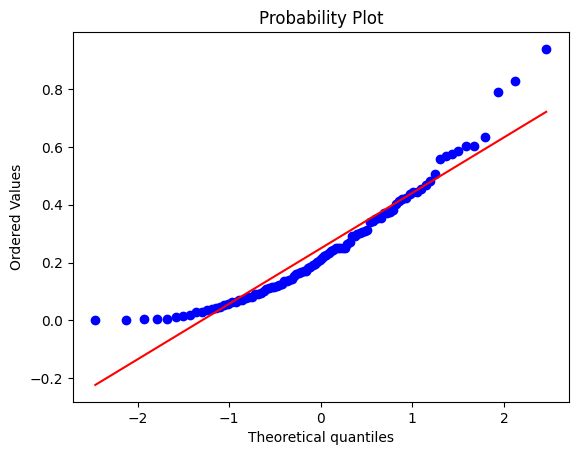

In [6]:
import scipy.stats as stats
stats.probplot(df["awake_ratio"],plot=pylab)

We see that many data points are not on the red line. Therefore this variable is not normally distributed.

__________

### If our data are **not** normally distributed, we can normalise them by transforming them. In normalisation we are **changing the shape of the distribution of our data**. 

Examples of types of normalisation: 

1. **Log Transformation** : In Log transformation each variable of x will be replaced by log(x) with base 10, base 2, or natural log.

2. **Square-Root Transformation** : It can be applied to zero values but it has a more moderate effect than log transformation. 

3. **Reciprocal Transformation** : X is replaced by the inverse of x (1/x). This transformation can be only used for non-zero values.


4. **Box-Cox Transformation** :  Values have to be positive. 

5. **Yeo-Johnson Transformation** : This transformation is similar to Box-Cox but for this values do not have to be positive. However, it is not the best solution for all types of data. 

More on these normalisation methods using python can be viewed here:  https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9

_______

## **Normalisation in machine learning**

- Even though parametric statistical tests, and some machine learning models like Gaussian Naive Bayes assume normality of the features, **in machine learning our features usually do not need to follow a normal (Gaussian) distribution.** 

- However, there are some other methods used to transform the data in machine learning which are important.  These techniques can help to improve **model performance**, **reduce** the impact of **outliers**, and ensure that the **data is on the same scale**. 

### **Why do we scale our data in machine learning?**

- When we use multiple **features** or else **variables** in a machine learning model as input to contribute to the model's prediction we do not want features that naturally have bigger values to have a bigger effect on the model. We want all our variables to contribute equally. This enables the model to identify patterns based on their actual significance rather than being biased by the raw magnitudes of the variables.

- By scaling our variables, we can  compare different variables **on equal footing**.

- For instance, let's say we have physiological variables: heart rate and respiratory rate. A normal resting heart rate for adults ranges from 60 to 100 beats per minute. A normal respiratory rate for an adult is 12 to 18 breaths per minute. A change to the normal heartbeat that will help the model predict an abnormality could be of ±20. On the contrary, respiratory rate cannot fluctuate on the range of 20 but will likely have a smaller change which could contribute to the model prediction. 

- Scaling facilitates fair comparisons among variables by transforming their values into a scaled range. This is particularly important when features have different units or magnitudes as in the example above.

### 1. **Z-Score normalisation (Standardisation)** : 

- We use z-score to ensure your feature values have overall mean = 0 and standard deviation(std) = 1. 

- Z-score normalization does not transform the feature values so that the data follows a normal distribution. The transformed data are "normal" only in the sense of having zero mean and unit standard deviation. Also, this process  is called normalisation since this technique **changes the shape of the distribution**. However, it **does not guarantee** that the transformed data will follow a gaussian distribution.

### 2. **Scaling to a range**  (e.g. 0-100 or 0-1) : 

- One example that is often used in machine learning applications is **min-max scaling** which scales the data from 0 to 1. In scaling, you're changing the range of your data. The **data distribution** stays the **same**.




___________

# **Min - Max scaling**

The data points are **shifted** and **rescaled** so that they end up in a range of 0 to 1.  For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

                                           scaled_value = (x - min_value) / (max_value - min_value)


### **When would we use min-max scaling?**

1. We know the approximate upper and lower bounds on the data with few or no outliers.

2. The data is approximately uniformly distributed across that range. (e.g age : most age values falls between 0 and 90, and every part of the range has a substantial number of people). 

4. Min max is beneficial when the absolute values of the metrics are not as important as their relative positions within the dataset.

### **When not to use min-max scaling?**

- Min max scaling guarantees all features will have the exact same scale but does not handle outliers well.

- Compressing the data set in a small range ([0, 1]) might result in loss of significant information

- We would not use scaling on income, because only a few people have very high incomes. The upper bound of the linear scale for income would be very high, and **most people wo uld be squeezed into a small part of the scale.**

### **Exercise**

### Try to perform min-max normalisation on the feature "deep_ratio" from the example data from the dataframe(df) that was given beforehand. For this keep in mind the equation provided above!

In [7]:
deep_ratio = df["deep_ratio"]














### **Solution**

In [8]:
deep_ratio = df["deep_ratio"]
min_value = min(deep_ratio)
max_value = max(deep_ratio)

scaled_values = [] # we create an empty list that will store all the scaled values

for value in deep_ratio: # we create a loop that goes over each value in the data list 
    scaled_value = (value - min_value) / (max_value - min_value)
    scaled_values.append(scaled_value) # each scaled value is added to the list that is initially empty. 

### However, in python you can use the in-built function MinMaxScaler from the scikit learn library!

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Reshape the data to a 2D array (required by MinMaxScaler)
deep_ratio_reshaped = deep_ratio.values.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# We fit the MinMaxScaler object to the data and then transform it 
scaled_data_minmax = scaler.fit_transform(deep_ratio_reshaped) #(The fit_transform function does both fit and transform simultaneously)

print("Original Data:")
print(deep_ratio)
print("\nScaled Data:")
print(scaled_data_minmax)


Original Data:
0     0.260681
1     0.348562
2     0.228556
3     0.074851
4     0.178544
        ...   
95    0.228395
96    0.344481
97    0.409155
98    0.234792
99    0.529032
Name: deep_ratio, Length: 100, dtype: float64

Scaled Data:
[[0.46848538]
 [0.6425489 ]
 [0.40485517]
 [0.1004172 ]
 [0.30579771]
 [0.35180988]
 [0.46177194]
 [0.60874636]
 [0.16451558]
 [0.20965764]
 [0.43621452]
 [0.92338797]
 [0.57436246]
 [0.22308175]
 [0.15374162]
 [0.40107088]
 [0.42594091]
 [0.77370029]
 [0.20912034]
 [0.58776077]
 [0.23714472]
 [0.86250153]
 [0.79191909]
 [0.75889236]
 [0.74586759]
 [0.3764727 ]
 [0.90386907]
 [0.4295622 ]
 [0.59331893]
 [0.93744191]
 [0.12885074]
 [0.80233717]
 [0.14510574]
 [0.11428073]
 [0.34666536]
 [0.99002621]
 [0.46691193]
 [0.77133994]
 [0.44662342]
 [0.36483398]
 [0.84792228]
 [0.66197256]
 [0.87797176]
 [0.2651954 ]
 [0.16686133]
 [0.56614237]
 [0.40813604]
 [0.45368391]
 [0.53486614]
 [0.44316548]
 [0.35576024]
 [0.27673995]
 [0.41887396]
 [0.30826562]
 [0.

### Try to perform min-max normalisation using the sci-kit learn option, on the feature "blood_pressure" from the example data from the dataframe(df) that was given beforehand.

_________

## **Z - score normalisation (Standardisation)**

(1) Standardisation or else z-score normalisation is the process of rescaling the features so that so that the mean of all of the values in the dataset is 0 and the standard deviation is 1.

(2) We can also think of z-score normalisation as a way to see  how many standard deviations, a specific data point, differs from the overall mean of the population.

(3) **Attention!**  With Z-score normalisation you have both positive and negative values. There is no minimum and maximum value for the scaled data as in the case of min-max. Depending on if you have outliers or not you might have values <-1 and >1! (The z-score normalisation does not guaraantee that the data is normally distributed after the transformation)

                                                        Scaled value = (x - μ) / σ

Where:
- x: The original value of the data point.
- μ: The mean (average) of all data points in the dataset.
- σ: The standard deviation of all data points in the dataset..


(4) If a value is exactly equal to the mean of all the values of the feature, it will be normalized to 0. If it is below the mean, it will be a negative number, and if it is above the mean it will be a positive number.

### **When to use z-score normalisation?**

1. Handling Outliers: Z-score normalization is less sensitive to outliers compared to min-max scaling. If the data contains outliers, using z-score normalization might be preferable as it does not scale the data to a specific range and is less affected by extreme values.

2. Comparing Relative Positions: Z-score normalization is useful when you want to compare the relative positions of data points across different features. It centers the data around zero and scales it based on the standard deviation, making it easier to interpret the significance of values in terms of standard deviations from the mean. (for example for the same patient across different features)

3. Preserving Distribution Shape: If the shape of the original distribution is not a primary concern, and you're more interested in the relative positions and relationships between data points, z-score normalization can be a suitable choice.

4. When we care about the relative positions of the data points in the dataset.

### **When not to use z-score normalisation?**

1. When there are too many extreme outliers. In this case other pre-processing steps could be followed like trimming or winsorizing the outliers(https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/), or robust scaling (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html).

2. When we want the exact same scale for all features. This may not be feasible if we have extreme outlier values in one feature for the same data point and normal values in other features.

### **Exercise**

### Try to perform z-score normalisation on the column deep ratio of the dataframe(df) given before! Try to use the equation given above!

### **Solution**

In [10]:
mean_value = sum(deep_ratio) / len(deep_ratio)
variance = sum((x - mean_value) ** 2 for x in deep_ratio) / len(deep_ratio)
std_dev = variance ** 0.5

scaled_z_data = [(x - mean_value) / std_dev for x in deep_ratio]

print("Original Data:")
print(deep_ratio)
print("\nScaled Data:")
print(scaled_z_data)

Original Data:
0     0.260681
1     0.348562
2     0.228556
3     0.074851
4     0.178544
        ...   
95    0.228395
96    0.344481
97    0.409155
98    0.234792
99    0.529032
Name: deep_ratio, Length: 100, dtype: float64

Scaled Data:
[-0.08843560118249919, 0.6657917468899326, -0.3641489991541763, -1.6832964242136002, -0.7933707705376943, -0.5939973596425315, -0.11752533031522658, 0.5193233657624541, -1.405554443059549, -1.2099512693486116, -0.2282671221771618, 1.882683751307628, 0.37033591391074355, -1.1517838020963715, -1.4522386149022544, -0.3805465838436693, -0.27278327353884546, 1.2340783351506441, -1.2122794045201915, 0.4283915643686097, -1.090848154637304, 1.6188592839861684, 1.313021472067725, 1.1699147183252607, 1.1134776301436524, -0.4871319087125612, 1.7981072393392084, -0.25709203877469405, 0.4524754234307407, 1.9435803101118863, -1.5600922375720834, 1.3581635857675922, -1.4896584104518062, -1.6232249449651615, -0.6162888602173923, 2.1714311306676044, -0.09525346413647

### However, in python you can use the in-built function StandardScaler from the scikit learn library!

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
scaled_z_data = scaler.fit_transform(deep_ratio.values.reshape(-1,1))  # the function expects a 2d array and the data array that we have above was 1-d. For this reason we reshape it. 

print("Original Data:")
print(deep_ratio)
print("\nScaled Data:")
print(scaled_z_data)

Original Data:
0     0.260681
1     0.348562
2     0.228556
3     0.074851
4     0.178544
        ...   
95    0.228395
96    0.344481
97    0.409155
98    0.234792
99    0.529032
Name: deep_ratio, Length: 100, dtype: float64

Scaled Data:
[[-0.0884356 ]
 [ 0.66579175]
 [-0.364149  ]
 [-1.68329642]
 [-0.79337077]
 [-0.59399736]
 [-0.11752533]
 [ 0.51932337]
 [-1.40555444]
 [-1.20995127]
 [-0.22826712]
 [ 1.88268375]
 [ 0.37033591]
 [-1.1517838 ]
 [-1.45223861]
 [-0.38054658]
 [-0.27278327]
 [ 1.23407834]
 [-1.2122794 ]
 [ 0.42839156]
 [-1.09084815]
 [ 1.61885928]
 [ 1.31302147]
 [ 1.16991472]
 [ 1.11347763]
 [-0.48713191]
 [ 1.79810724]
 [-0.25709204]
 [ 0.45247542]
 [ 1.94358031]
 [-1.56009224]
 [ 1.35816359]
 [-1.48965841]
 [-1.62322494]
 [-0.61628886]
 [ 2.17143113]
 [-0.09525346]
 [ 1.22385079]
 [-0.18316474]
 [-0.53756315]
 [ 1.55568653]
 [ 0.74995558]
 [ 1.68589267]
 [-0.9693029 ]
 [-1.39539017]
 [ 0.33471778]
 [-0.3499328 ]
 [-0.15257126]
 [ 0.19919606]
 [-0.19814819]
 [-0.57688

### Compare the distribution of the deep ratio data. The original (raw values), the min-max scaled data and the z-score normalised data. What has changed? What has not changed?

### **Solution**

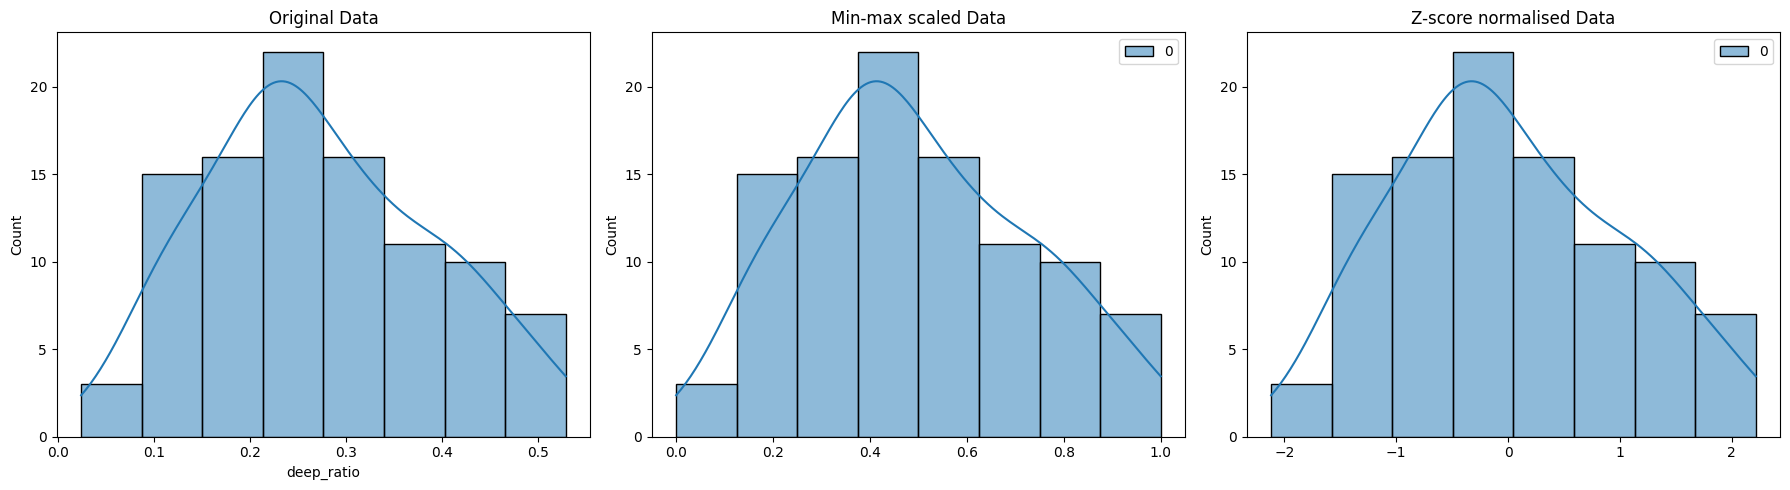

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot original data
sns.histplot(deep_ratio, ax=axes[0], kde=True)
axes[0].set_title('Original Data')

# Plot min-max scaled data
sns.histplot(scaled_data_minmax, ax=axes[1], kde=True)
axes[1].set_title('Min-max scaled Data')

#Plot z-score normalised data
sns.histplot(scaled_z_data, ax=axes[2], kde=True)
axes[2].set_title('Z-score normalised Data')

plt.tight_layout()
plt.show()


### **Answer:** 




The distribution has not changed. The deep ratio column provided in the dataframe was not following a normal distribution before scaling and did not follow a normal distribution after scaling with either of the two ways either. What has changed is the range of the values. 

After all this is why scaling is used in machine learning!  To bring different features onto a similar scale, allowing models to perform well without being influenced by the varying magnitudes of the features!

## **Min-Max Scaler  vs                                                                    Z-score normalisation (Standardisation)**

Scaling just changes the range of your data. Z-score normalisation shifts and rescales the distribuion.

(1) The choice between normalisation and standardisation depends on the distribution of the features. If the features have a similar range and are normally distributed, standardisation is preferred. However, if the features have a different range or the range is unknown, min-max scaling is preferred.

(2) If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

(3) Z-score normalisation handles outliers. It does not get affected by outliers because there is no specific range that the transformed features have to be in.


(4) After Z-score normalisation the features do not have the exact same scales as with min-max scaling, since there is no minimum and maximum value for z-score normalisation.

(5) Min-max scaling focuses only on the range of values (max-min) and scales the data proportionally within this range. It doesn't consider the overall data distribution or variability around the mean. Standardization incorporates information about the mean and standard deviation, offering a more comprehensive scaling. By adjusting the data based this way standardization better preserves relationships between data points.

There is generally no golden rul to decide between min-max scaling and z-score normalisation. It always depends on your data. 

You can try the model training with raw, min-max scaled, and standardized data, allowing for a comparison of their respective performances to determine the optimal approach for achieving the best results.

### **Visualisation of the two different methods**

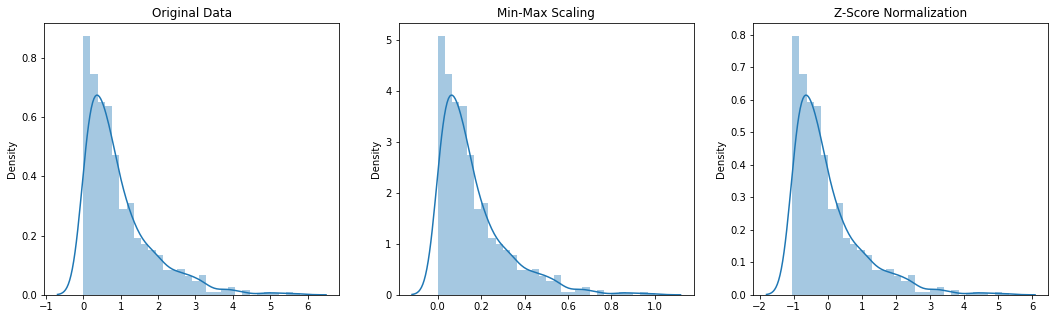
Figure 1

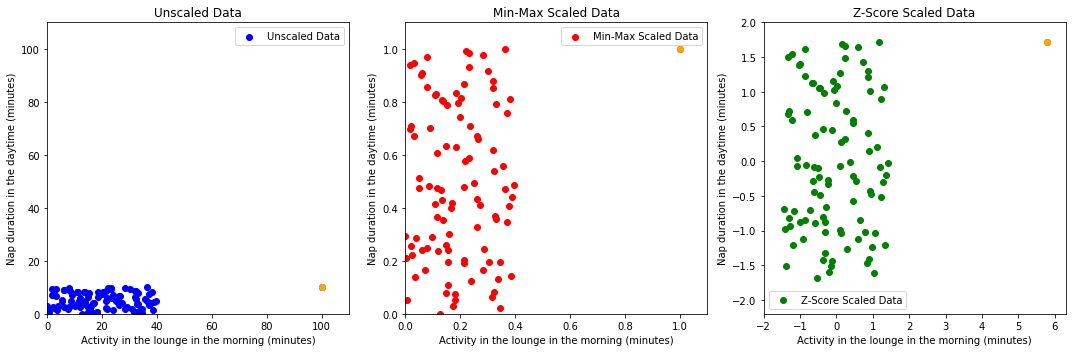
Figure 2

The data in the **Figure 2** in the Unscaled data are squished. This is because there is an outlier (yellow dot in the figures). In both scaled figures the datapoints are less squished.

In Min-Max Scaled figure, both features' values range from 0.0 to 1.0. However, in the Z-score normalised data the nap duration feature ranges from -2.0 to 2.0, while the activity in the lounge in the morning values range from -2 to 6.


_____

### **Practice (Normalisation, Standardization, Min-max)**

1. You are trying to build a regression model to predict patient's cognitive scores using neuropsychological decline measured by neuropsychiatric inventory(NPI) assessments. In the NPI some patients show improvement, while others remain the same and few of them experience a very big decline. Would you normalise(with Box-Cox), min-max scale or standardize the data? 

2. You are still trying to work on this regression predictive model but you want to include more information on the patients' sleep quality. For this reason you will use the Pittsburgh Sleep Quality Index (PSQI) scoring change. The PSQI is from range 0 to 21. The NPI are from range of 0 to 144 (frequency x severity of all symptoms). Should you scale (either with Z-score normalisation or Min-max) or normalize with Box-Cox each of the two variables?


3. The dataset includes data from 50 patient households and you want to perform parametric statistical tests to compare the activity between different rooms and also between different households. How would you normalise/scale the data?

### **Answer**

<details>
<summary> Click arrow to show answer</summary>

1. We would standardise the data since there are outliers (people who experience big decline). Standardisation works better for outliers. In linear regression the data does not necessarily have to be normally distributed.

2. We would scale the variables so that the features are on the same range. We do not need to normalise with Box-Cox.

3. Different approaches:

   (a) Normalizing all patients' data together ensures a uniform scale for all patients' information.

   (b) Normalizing data per household accounts for variations between patients living in different households.

   (c) Normalizing data per household and room considers differences within households and further distinguishes room-specific variations.

   (d) Normalizing female and male patients' data separately addresses gender-specific variations in behavior and activity.

   (e) Normalizing by time period, household, and room accounts for differences within each time period, across various households, and within specific rooms.
   None of these is wrong! It all depends on what you want to compare and what you want to account for.

## **More insights in normalisation for machine learning :**

### **1)Specific machine learning models and scaling. Why is it important?**

i. Distance algorithms like KNN, K-means clustering, and SVM(support vector machines) are most affected by the range of features. This is because they are using distances between data points to determine their similarity. Therefore, scaling is important for this. With these algorithms, a change of "1" in any numeric feature is given the same importance. Therefore, all features must be in the same/similar scale (min-max and z-score are both acceptable).

ii. Gradient Descent Based Algorithms like linear regression, logistic regression, neural network, PCA (principal component analysis), etc., that use gradient descent as an optimization technique require data to be scaled.  "Having features on a similar scale can help the gradient descent converge more quickly towards the minima."

iii. Tree-based algorithms: e.g random forest, adaptive boosting, extreme gradient boosting: These algorithms do not require feature scaling, since a decision tree works by splitting a node based on a single feature, aiming to increase the homogeneity within this node. The choice of which feature to split on is independent of other features.Therefore, the decision tree's splitting process is not influenced by the scale of the remaining features. 




**However, there are some times when scaling is important, even for tree-based algorithms**. 
For instance, in a dataset that contains multiple patients, there are people who have naturally higher values of specific features (e.g activity in the kitchen). The idea is to account for individual variability by standardizing each patient's data relative to their own baseline. This helps prevent patients with naturally higher or lower baseline values from disproportionately influencing the model. 

### **2) Data leakage caused by normalisation?**

Data leakage occurs when information from the training dataset is inadvertently exposed to the validation dataset. 

To mitigate this issue, it is crucial to fit the scaler exclusively on the training data and then applying the same scaler to transform the test data. This sequential approach ensures that the scaling parameters derived from the training set remain independent of the test set, preventing any  transfer of information.

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate random data
np.random.seed(42)
train_data = np.random.normal(0, 1, size=(100, 1))
test_data = np.random.normal(0, 1, size=(50, 1))

# Split the data into train and test sets
X_train, X_test, _, _ = train_test_split(train_data, train_data, test_size=0.2, random_state=42)

# Fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Check mean and standard deviation for demonstration purposes
print("Training Data - Mean:", np.mean(X_train_scaled), "Std Dev:", np.std(X_train_scaled))
print("Test Data - Mean:", np.mean(X_test_scaled), "Std Dev:", np.std(X_test_scaled))


Training Data - Mean: -1.1102230246251566e-17 Std Dev: 1.0
Test Data - Mean: 0.077547870486873 Std Dev: 0.846491570828736


**Here we can see that we first split the data and then we do the z-score normalisation.**

_____

# **Imputation**

Real world data and uncontrolled studies have missing data! Some times a device breaks down and there are no data for a whole evening from a household. What do we do with this data?? 

(1) For statistics: It is better to avoid imputation. This is because if there is a trend in our dataset which is non-significant, when imputing the data the trend may become even more intense which may result to a fake significant difference.


(2) For machine learning: Imputation is very crucial. Supervised machine learning algorithms cannot work if we have missing data (NaN values)

##### Here is a dataframe of 30 patients with missing values in only one column. 

In [14]:
# Do not change the code in this cell

from sklearn.impute import KNNImputer

data = {
    'Patient_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'HeartRate': [80, 85, 90, 92, 60, 75, 88, 78, 95, 70, 82, 77, 89, 72, 67, 93, 65, 75, 88, 91, 78, 96, 62, 84, 77, 70, 68, 85, 89, 73],
    'RespiratoryRate': [12, 15, 18, 12, 13, 11, 16, 14, 19, 15, 17, 14, 20, 13, 12, 18, 15, 14, 16, 19, 13, 17, 12, 15, 14, 16, 13, 19, 18, 16],
    'SleepDuration(hours)': [6, 7, np.nan, 8, 10, 7, 8, 9, 7, np.nan, 7, 6, 8, np.nan, 9, 8, 7, 6, 9, 10, 7, 8, np.nan, 9, 6, 10, 8, np.nan, 7, 9],
    'KitchenActivityNight(minutes)': [45, 50, 49, 55, 48, 52, 47, 53, 50, 49, 46, 51, 49, 54, 47, 53, 55, 52, 50, 48, 46, 53, 49, 50, 51, 48, 52, 47, 55, 49],
    'LoungeActivityMorning(minutes)': [30, 35, 35, 32, 34, 36, 33, 31, 37, 38, 35, 39, 32, 34, 36, 33, 35, 37, 30, 38, 31, 33, 34, 32, 39, 36, 37, 35, 38, 31]
}

df = pd.DataFrame(data)
df = df.set_index(["Patient_ID"])

df

,HeartRate,RespiratoryRate,SleepDuration(hours),KitchenActivityNight(minutes),LoungeActivityMorning(minutes)
Patient_ID,,,,,
1,80,12,6.0,45,30
2,85,15,7.0,50,35
3,90,18,NaN,49,35
4,92,12,8.0,55,32
5,60,13,10.0,48,34
6,75,11,7.0,52,36
7,88,16,8.0,47,33
8,78,14,9.0,53,31
9,95,19,7.0,50,37


As we can see in this example the column that has missing value is the sleep duration column. There are many different ways to impute these missing values.

## **1. Simple imputation**

The missing values are imputed using the mean or the median value of all the data points for this feature (in this case the sleep duration).

Learn more about simple imputation here: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer

In [15]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer using 'mean'
mean_imputer = SimpleImputer(strategy='mean')

# Impute missing values using mean
df_mean_imputed = mean_imputer.fit_transform(df)
df_mean_imputed = pd.DataFrame(df_mean_imputed, columns=df.columns, index=df.index)

# Create a SimpleImputer using  'median'
median_imputer = SimpleImputer(strategy='median')

# Impute missing values using median
df_median_imputed = median_imputer.fit_transform(df)
df_median_imputed = pd.DataFrame(df_median_imputed, columns=df.columns, index=df.index)


print("\nMedian-Imputed DataFrame:")
df_median_imputed


Median-Imputed DataFrame:


,HeartRate,RespiratoryRate,SleepDuration(hours),KitchenActivityNight(minutes),LoungeActivityMorning(minutes)
Patient_ID,,,,,
1,80.0,12.0,6.0,45.0,30.0
2,85.0,15.0,7.0,50.0,35.0
3,90.0,18.0,8.0,49.0,35.0
4,92.0,12.0,8.0,55.0,32.0
5,60.0,13.0,10.0,48.0,34.0
6,75.0,11.0,7.0,52.0,36.0
7,88.0,16.0,8.0,47.0,33.0
8,78.0,14.0,9.0,53.0,31.0
9,95.0,19.0,7.0,50.0,37.0


**Here we impute using the mean or the median of the sleep duration.**

## **2. K-Nearest neighbours(KNN) imputation**

The missing values are imputed using K number of other samples that are most similar to the data point of which we have a missing value for. 

Learn more about KNN imputation here : https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer

In [16]:
# KNN imputation with 2 neighbours. 
imputer = KNNImputer(n_neighbors=2)
df_knn_imputed = imputer.fit_transform(df)
df_knn_imputed = pd.DataFrame(df_knn_imputed, columns=df.columns)

print("KNN imputed DataFrame:")
df_knn_imputed

KNN imputed DataFrame:


,HeartRate,RespiratoryRate,SleepDuration(hours),KitchenActivityNight(minutes),LoungeActivityMorning(minutes)
0,80.0,12.0,6.0,45.0,30.0
1,85.0,15.0,7.0,50.0,35.0
2,90.0,18.0,9.0,49.0,35.0
3,92.0,12.0,8.0,55.0,32.0
4,60.0,13.0,10.0,48.0,34.0
5,75.0,11.0,7.0,52.0,36.0
6,88.0,16.0,8.0,47.0,33.0
7,78.0,14.0,9.0,53.0,31.0
8,95.0,19.0,7.0,50.0,37.0
9,70.0,15.0,9.0,49.0,38.0


### There are many other forms of imputation like iterative imputation :https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html ! You can read more about imputation here: https://scikit-learn.org/stable/modules/impute.html#impute
